## Grid Plots

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### JointGrid

In [2]:
cars = sns.load_dataset('mpg')

In [3]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
sns.set_style('darkgrid')

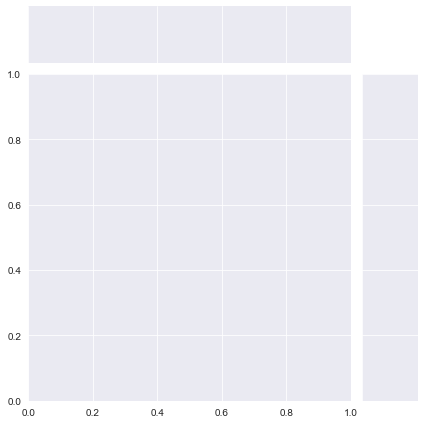

In [6]:
g = sns.JointGrid();

In [7]:
type(g)

seaborn.axisgrid.JointGrid

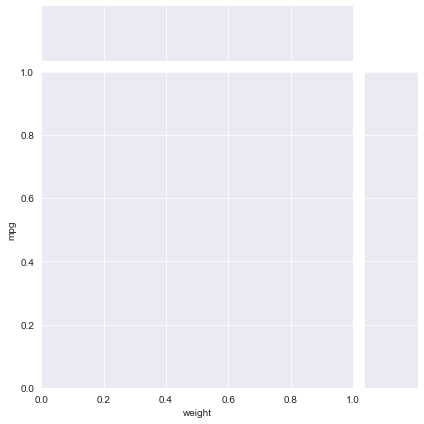

In [11]:
g = sns.JointGrid(data=cars, x='weight', y='mpg');

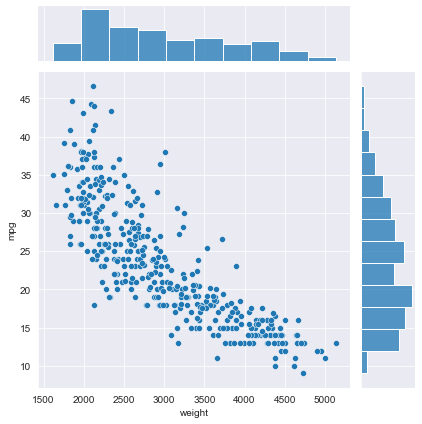

In [10]:
g = sns.JointGrid(data=cars, x='weight', y='mpg')
g.plot(sns.scatterplot, sns.histplot);

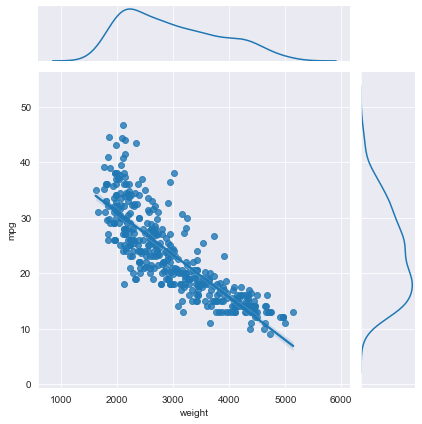

In [12]:
g = sns.JointGrid(data=cars, x='weight', y='mpg')
g.plot(sns.regplot, sns.kdeplot);

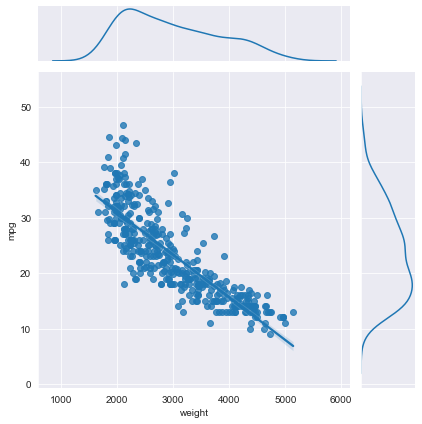

In [13]:
g = sns.JointGrid(data=cars, x='weight', y='mpg')
g.plot_joint(sns.regplot)
g.plot_marginals(sns.kdeplot);

# yukaridaki kodla bu kod ayni sonucu donuyor, peki neden bunu kullanmaliyim?
# cunku bu kodla hem joint icin hem de marginals icin ayri ayri styling yapma sansin var

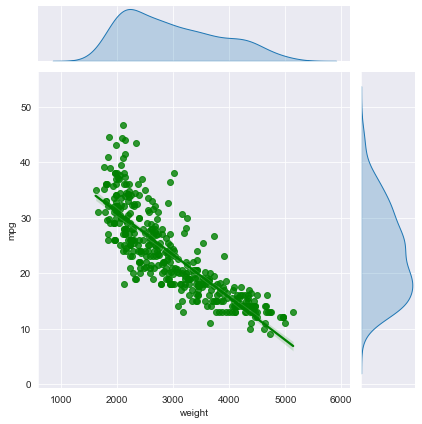

In [15]:
g = sns.JointGrid(data=cars, x='weight', y='mpg')
g.plot_joint(sns.regplot, color='g')
g.plot_marginals(sns.kdeplot, fill=True);

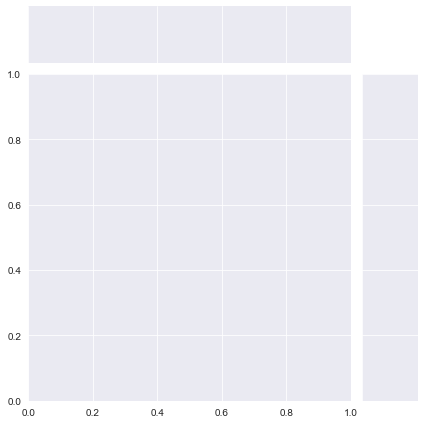

In [16]:
a = sns.JointGrid();

In [17]:
type(a.ax_marg_x)

matplotlib.axes._subplots.AxesSubplot

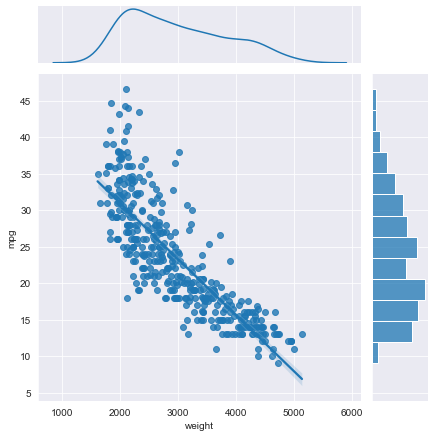

In [18]:
a = sns.JointGrid()
x, y = cars.weight, cars.mpg
sns.regplot(x=x, y=y, ax=a.ax_joint)
sns.kdeplot(x=x, ax=a.ax_marg_x)
sns.histplot(y=y, ax=a.ax_marg_y);

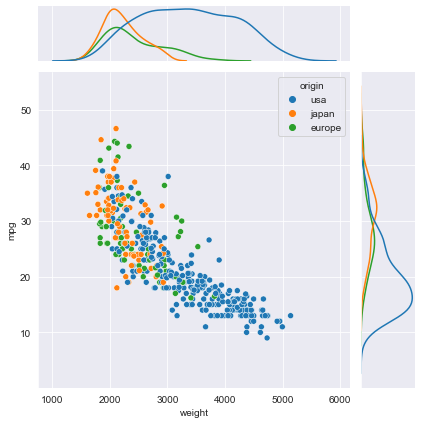

In [19]:
g = sns.JointGrid(data=cars, x='weight', y='mpg', hue='origin')
g.plot(sns.scatterplot, sns.kdeplot);

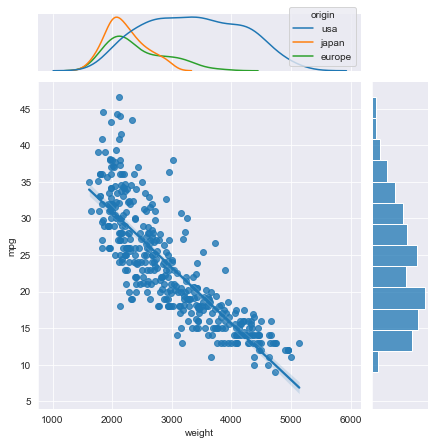

In [22]:
a = sns.JointGrid()
x, y = cars.weight, cars.mpg
sns.regplot(x=x, y=y, ax=a.ax_joint)
sns.kdeplot(x=x, ax=a.ax_marg_x, hue=cars.origin)
sns.histplot(y=y, ax=a.ax_marg_y);

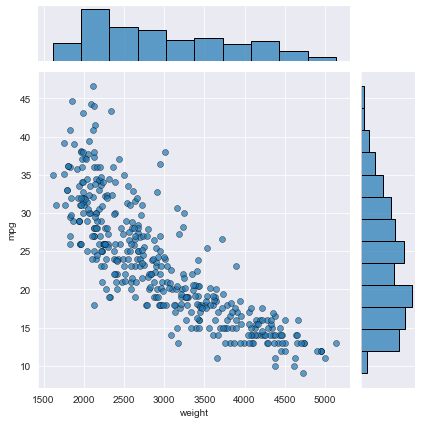

In [25]:
g = sns.JointGrid(data=cars, x='weight', y='mpg')
g.plot(sns.scatterplot, sns.histplot, alpha = 0.7, edgecolor='black');

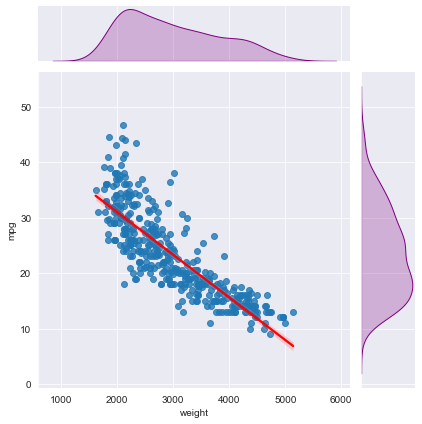

In [26]:
g = sns.JointGrid(data=cars, x='weight', y='mpg')
g.plot_joint(sns.regplot, line_kws={'color':'red'})
g.plot_marginals(sns.kdeplot, fill=True, color='purple');

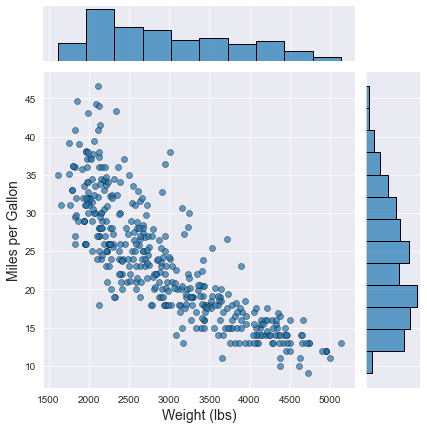

In [29]:
g = sns.JointGrid(data=cars, x='weight', y='mpg')
g.plot(sns.scatterplot, sns.histplot, alpha = 0.7, edgecolor='black')
g.set_axis_labels(xlabel='Weight (lbs)', ylabel='Miles per Gallon', fontsize=14)
g.savefig('Joint_Grid_Example.png');

In [30]:
!open Joint_Grid_Example.png
# to open the saved figure

### PairGrid

In [31]:
iris = sns.load_dataset('iris')

In [32]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


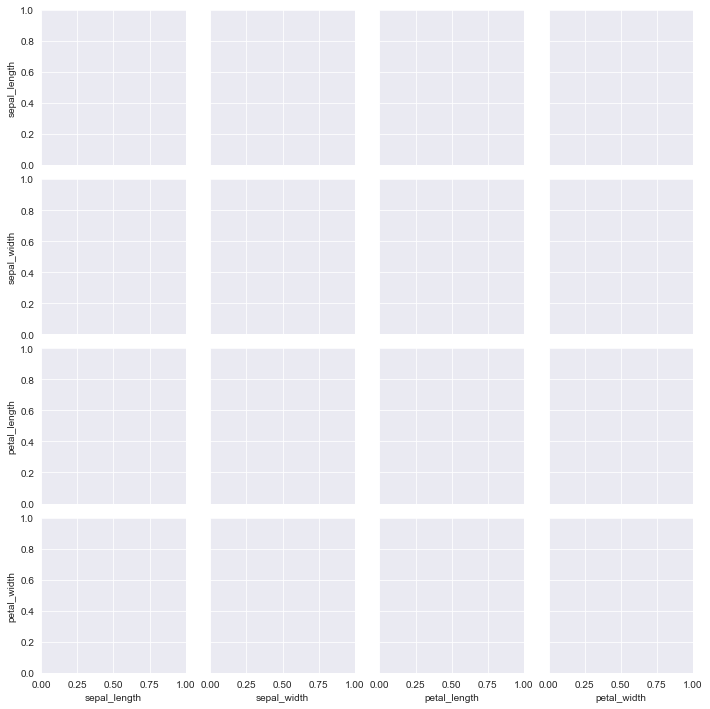

In [35]:
g = sns.PairGrid(iris);

In [34]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [36]:
type(g)

seaborn.axisgrid.PairGrid

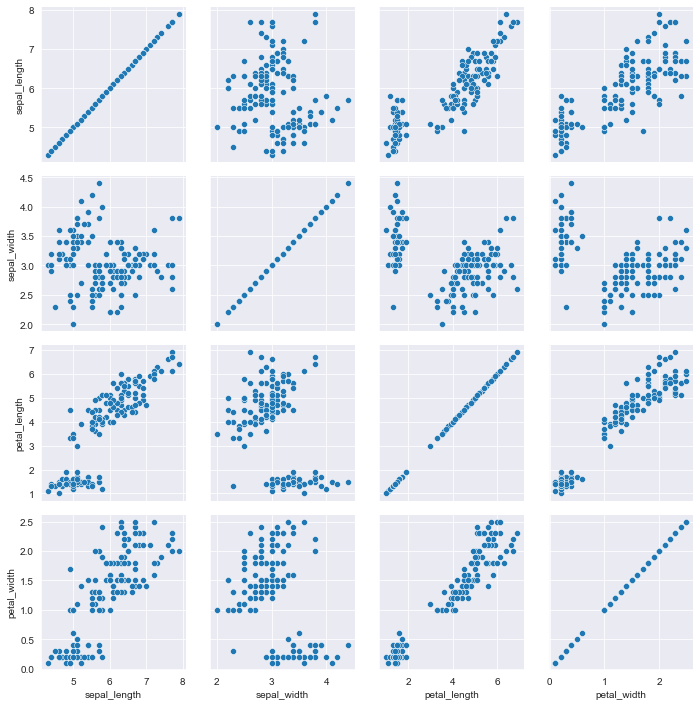

In [38]:
g = sns.PairGrid(iris)
g.map(sns.scatterplot);

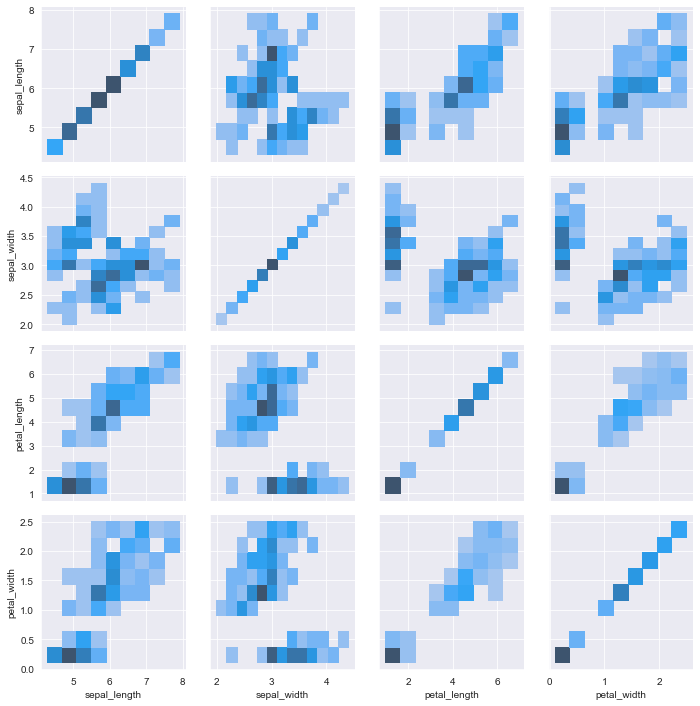

In [40]:
g = sns.PairGrid(iris)
g.map(sns.histplot);

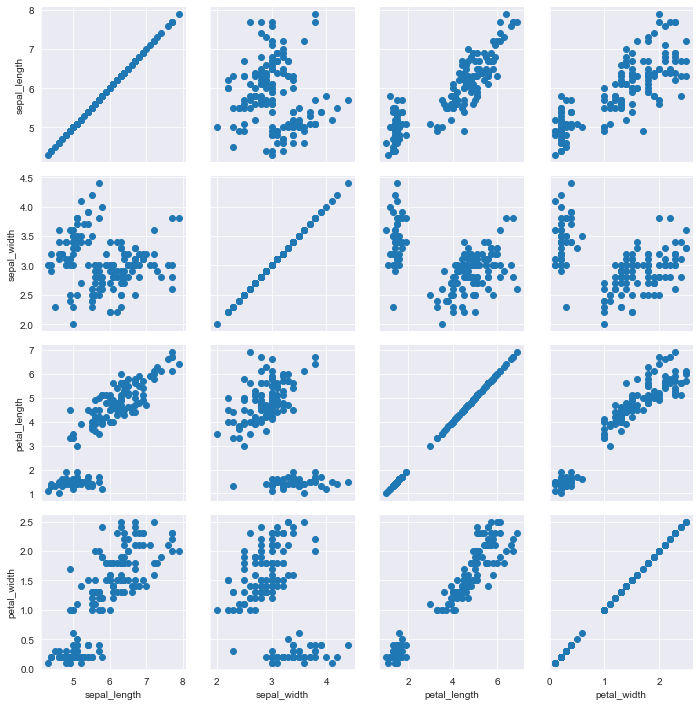

In [43]:
g = sns.PairGrid(iris)
g.map(plt.scatter);
# map'in istedigi bivariate plot'lama yapabilecek bir plot turu

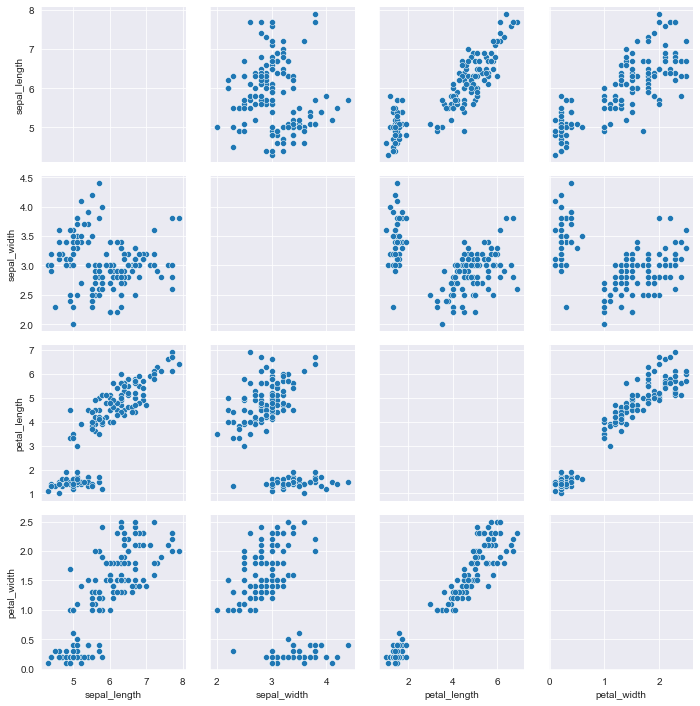

In [44]:
g = sns.PairGrid(iris)
g.map_offdiag(sns.scatterplot);

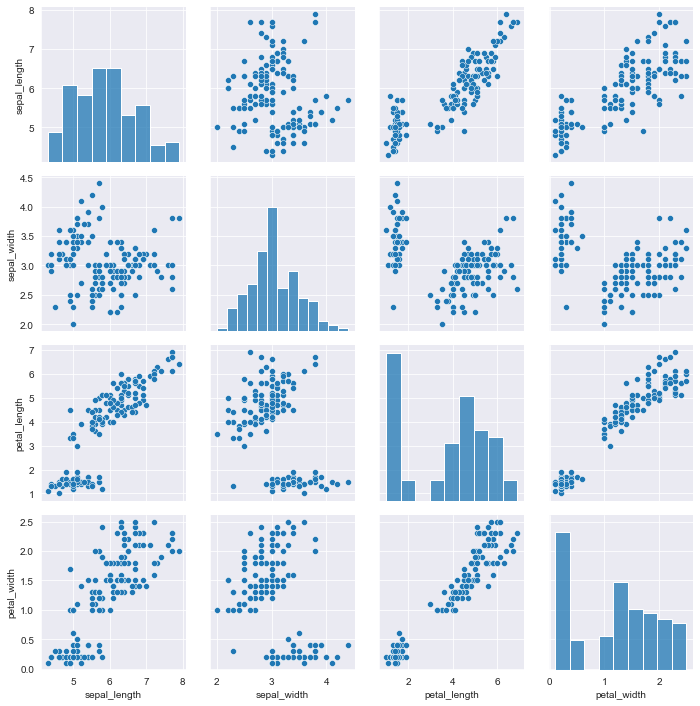

In [45]:
g = sns.PairGrid(iris)
g.map_offdiag(sns.scatterplot)
g.map_diag(sns.histplot);

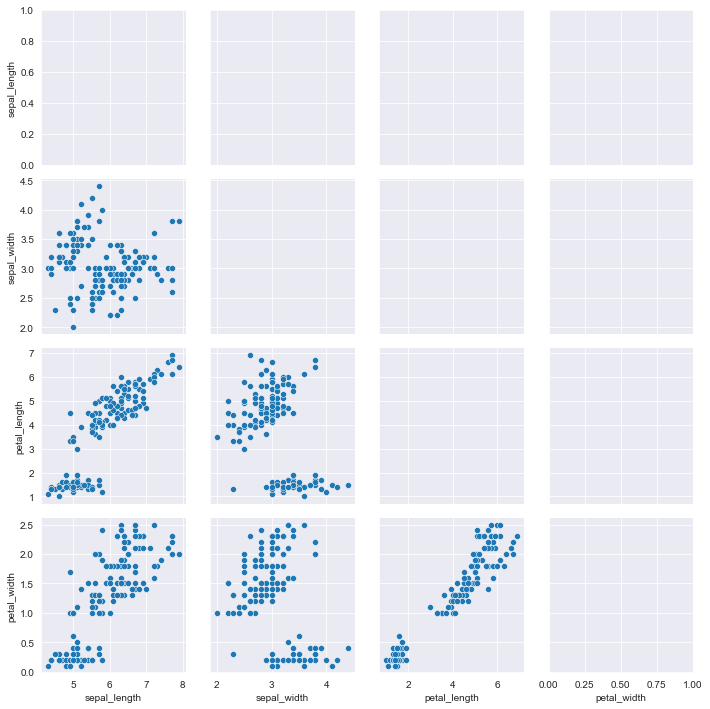

In [47]:
g = sns.PairGrid(iris)
g.map_lower(sns.scatterplot);

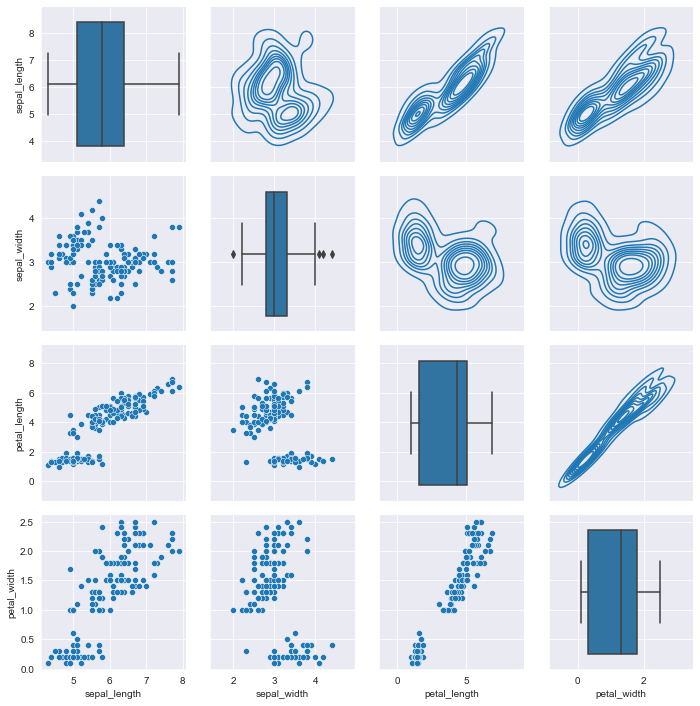

In [48]:
g = sns.PairGrid(iris)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)
g.map_diag(sns.boxplot);

# diagonal univariate, upper ve lower bivariate data

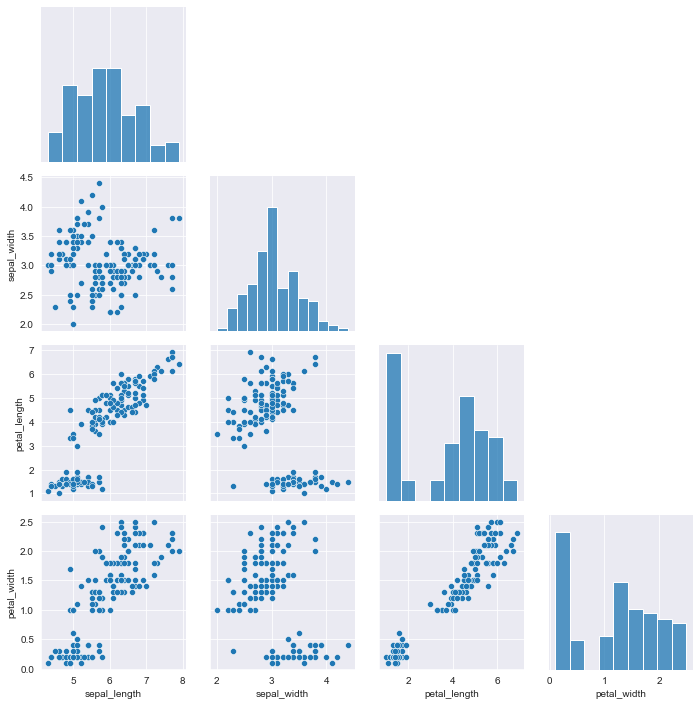

In [49]:
g = sns.PairGrid(iris, corner=True)
g.map_offdiag(sns.scatterplot)
g.map_diag(sns.histplot);

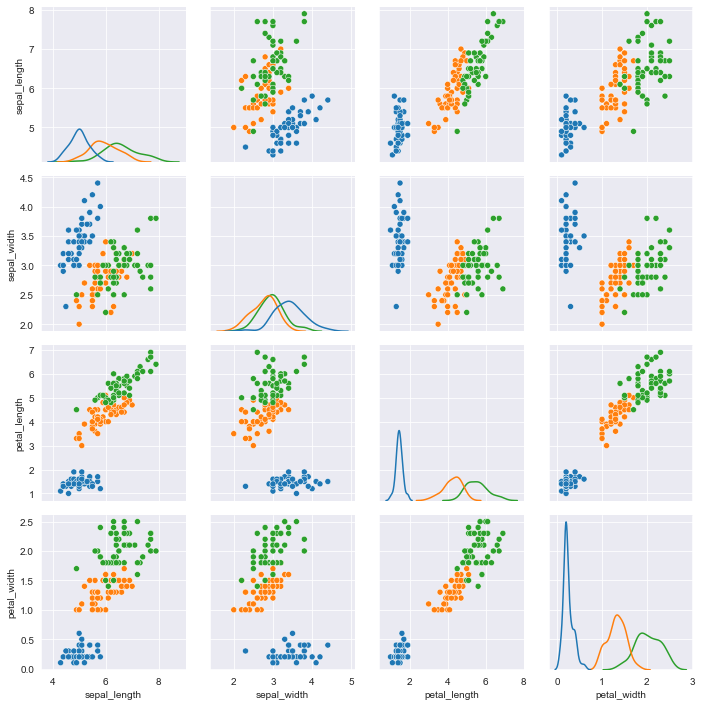

In [50]:
g = sns.PairGrid(iris, hue='species')
g.map_offdiag(sns.scatterplot)
g.map_diag(sns.kdeplot);

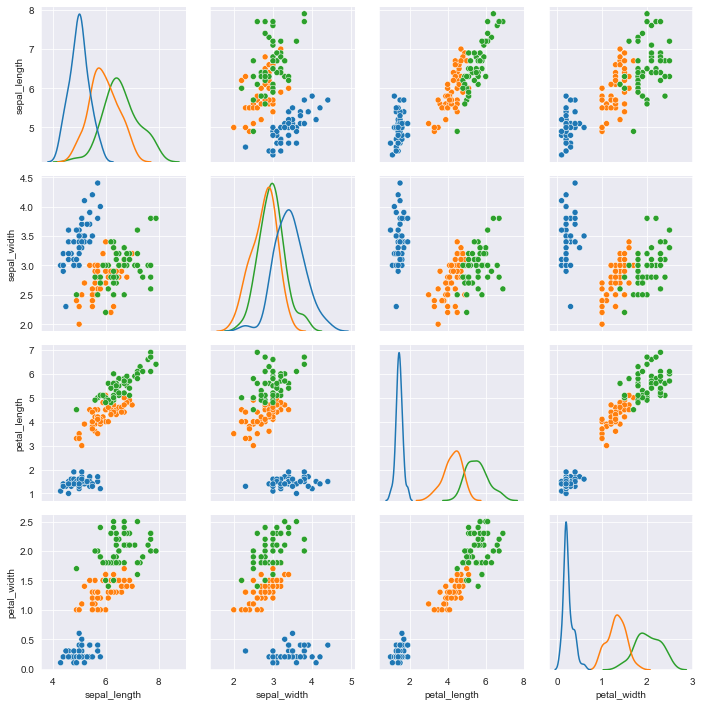

In [51]:
g = sns.PairGrid(iris, hue='species', diag_sharey=False)
g.map_offdiag(sns.scatterplot)
g.map_diag(sns.kdeplot);

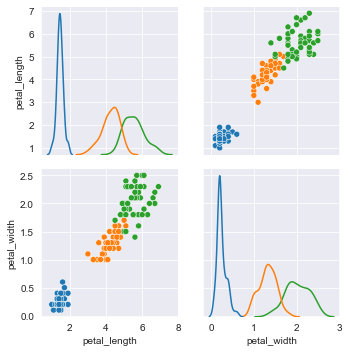

In [52]:
g = sns.PairGrid(iris, hue='species', diag_sharey=False, vars=['petal_length', 'petal_width'])
g.map_offdiag(sns.scatterplot)
g.map_diag(sns.kdeplot);

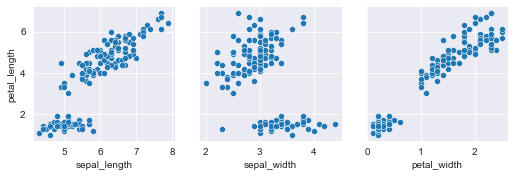

In [53]:
g = sns.PairGrid(iris, x_vars=['sepal_length', 'sepal_width', 'petal_width'],
                y_vars=['petal_length'])
g.map(sns.scatterplot);

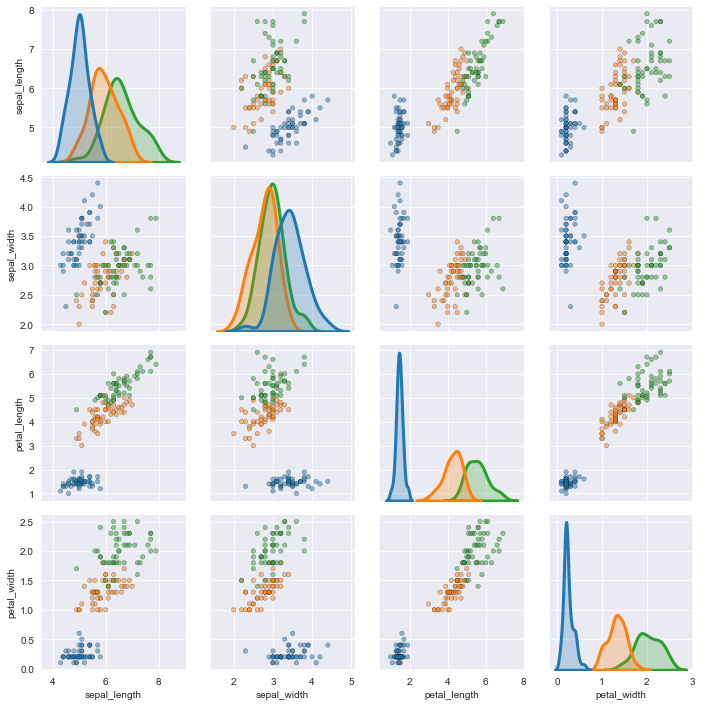

In [56]:
g = sns.PairGrid(iris, hue='species', diag_sharey=False)
g.map_offdiag(sns.scatterplot, s=20, alpha=0.5, ec='black')
g.map_diag(sns.kdeplot, fill=True, lw=3);

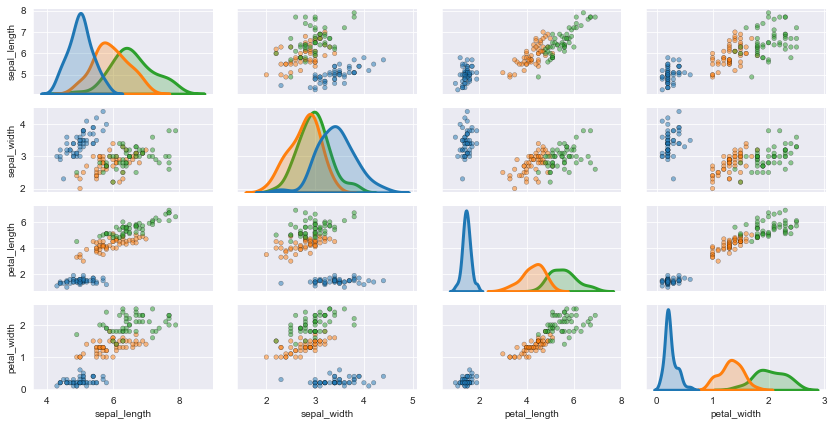

In [57]:
g = sns.PairGrid(iris, hue='species', diag_sharey=False, height=1.5, aspect=2)
g.map_offdiag(sns.scatterplot, s=20, alpha=0.5, ec='black')
g.map_diag(sns.kdeplot, fill=True, lw=3);

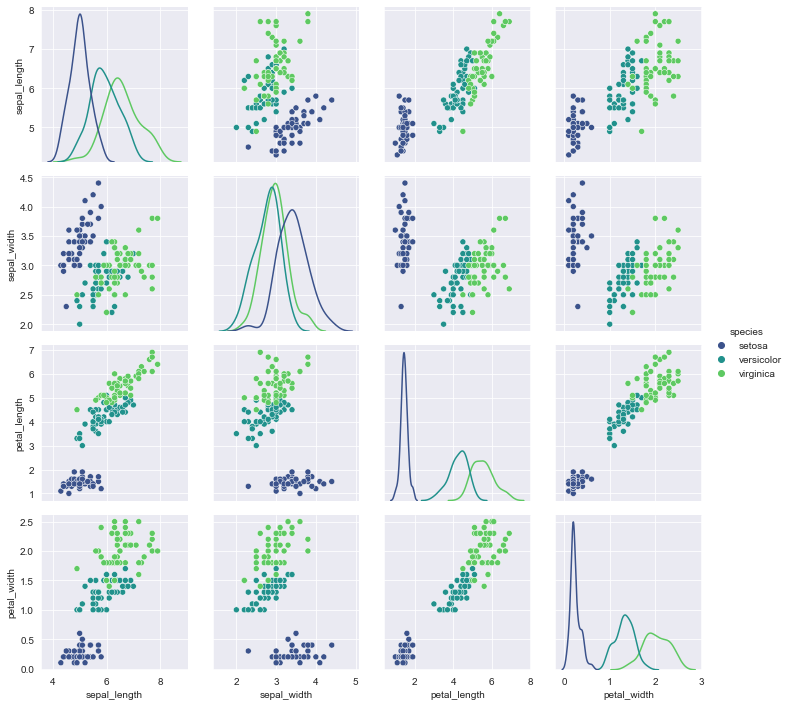

In [59]:
g = sns.PairGrid(iris, hue='species', diag_sharey=False, palette='viridis')
g.map_offdiag(sns.scatterplot)
g.map_diag(sns.kdeplot)
g.add_legend();

In [60]:
g.palette

[(0.229739, 0.322361, 0.545706),
 (0.127568, 0.566949, 0.550556),
 (0.369214, 0.788888, 0.382914)]

### FacetGrid

In [2]:
# facetgrid catplot, relplot ve displot'un arka planini olusturuyor

In [3]:
peng = sns.load_dataset('penguins')

In [4]:
peng.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [5]:
sns.set_style('white')

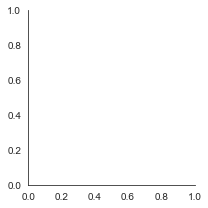

In [6]:
sns.FacetGrid(peng);

In [9]:
peng.island.value_counts().index

Index(['Biscoe', 'Dream', 'Torgersen'], dtype='object')

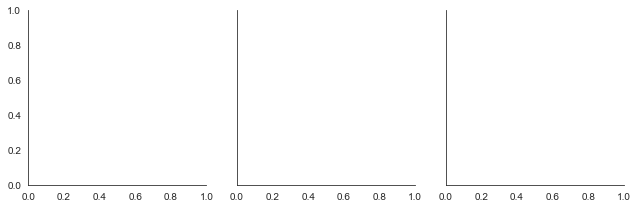

In [11]:
g = sns.FacetGrid(peng, col='island');
# island column'unda uc kategori oldugu icin uc tane grid getirdi
# row ve column kullanilabilir

In [12]:
type(g)

seaborn.axisgrid.FacetGrid

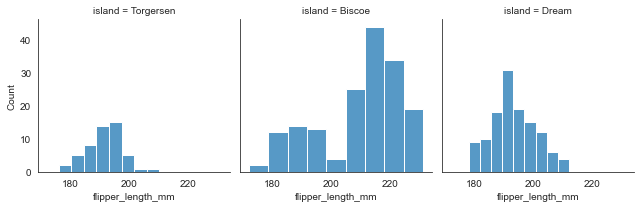

In [14]:
g = sns.FacetGrid(peng, col='island')
g.map(sns.histplot, 'flipper_length_mm');

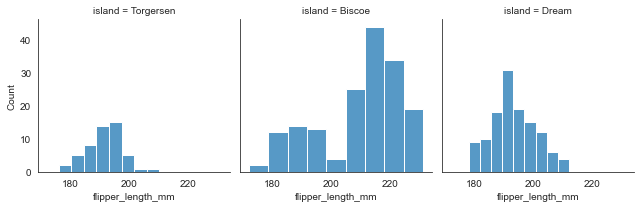

In [16]:
g = sns.FacetGrid(peng, col='island')
g.map_dataframe(sns.histplot, x='flipper_length_mm');
# sadece map_dataframe'de x veya y tanimlayarak plotlama islemini yapabilirim.

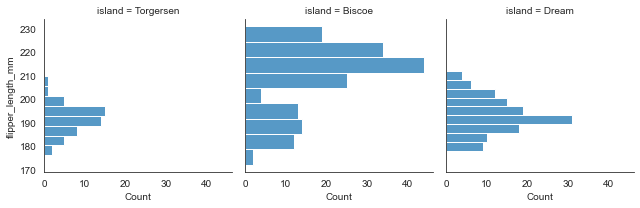

In [17]:
g = sns.FacetGrid(peng, col='island')
g.map_dataframe(sns.histplot, y='flipper_length_mm');

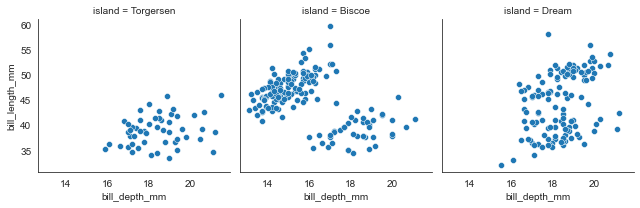

In [19]:
g = sns.FacetGrid(peng, col='island')
g.map_dataframe(sns.scatterplot, x='bill_depth_mm', y='bill_length_mm');

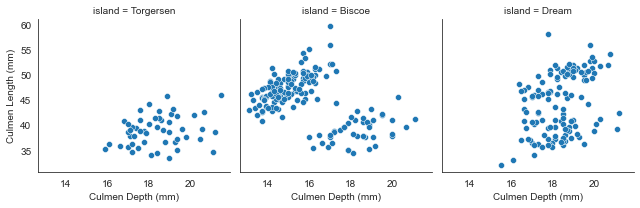

In [20]:
g = sns.FacetGrid(peng, col='island')
g.map_dataframe(sns.scatterplot, x='bill_depth_mm', y='bill_length_mm')
g.set_axis_labels('Culmen Depth (mm)', 'Culmen Length (mm)');

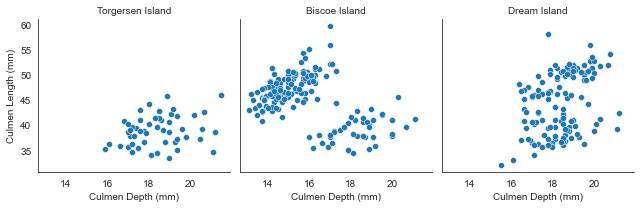

In [21]:
g = sns.FacetGrid(peng, col='island')
g.map_dataframe(sns.scatterplot, x='bill_depth_mm', y='bill_length_mm')
g.set_axis_labels('Culmen Depth (mm)', 'Culmen Length (mm)')
g.set_titles(col_template='{col_name} Island');

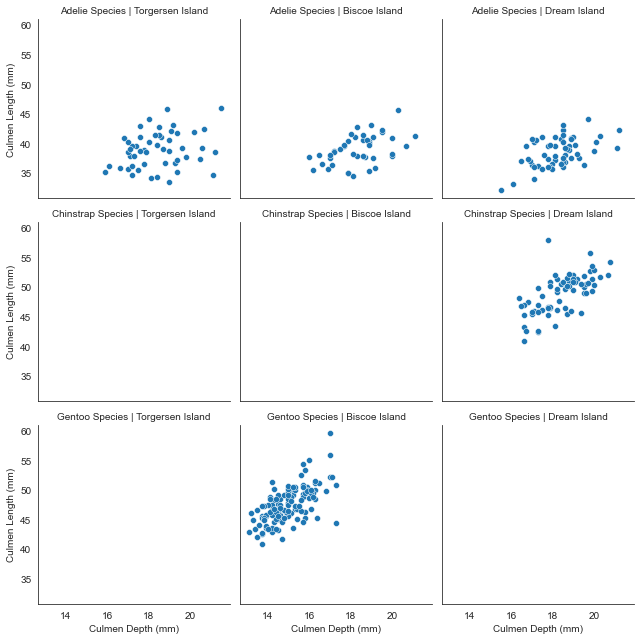

In [24]:
g = sns.FacetGrid(peng, col='island', row='species')
g.map_dataframe(sns.scatterplot, x='bill_depth_mm', y='bill_length_mm')
g.set_axis_labels('Culmen Depth (mm)', 'Culmen Length (mm)')
g.set_titles(col_template='{col_name} Island', row_template='{row_name} Species');

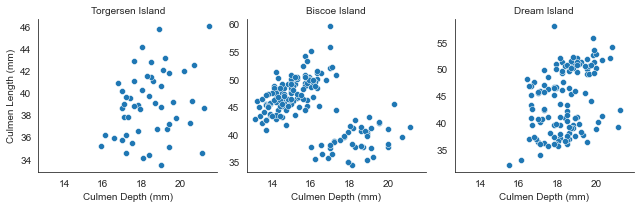

In [27]:
g = sns.FacetGrid(peng, col='island', sharey=False)

g.map_dataframe(sns.scatterplot, x='bill_depth_mm', y='bill_length_mm')
g.set_axis_labels('Culmen Depth (mm)', 'Culmen Length (mm)')
g.set_titles(col_template='{col_name} Island');

# sharey=False yaparak uc grafik icin y eksenindeki degerleri kendi degerlerine gore belirlemesini saglamdim

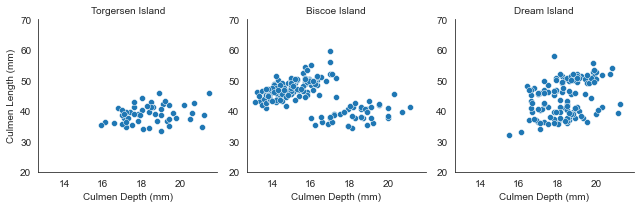

In [28]:
g = sns.FacetGrid(peng, col='island', sharey=False, ylim=(20,70))

g.map_dataframe(sns.scatterplot, x='bill_depth_mm', y='bill_length_mm')
g.set_axis_labels('Culmen Depth (mm)', 'Culmen Length (mm)')
g.set_titles(col_template='{col_name} Island');

# ylim ile y degerlerini uc grafik icin de sinirlandirmis oluyorum

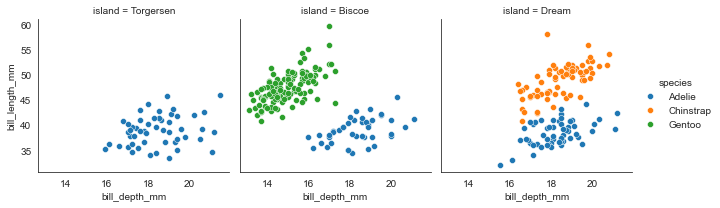

In [29]:
g = sns.FacetGrid(peng, col='island', hue='species')
g.map_dataframe(sns.scatterplot, x='bill_depth_mm', y='bill_length_mm')
g.add_legend();

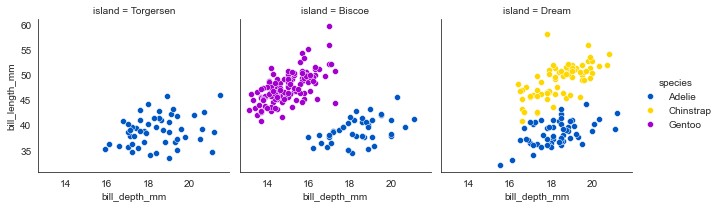

In [30]:
g = sns.FacetGrid(peng, col='island', hue='species', palette='prism')
g.map_dataframe(sns.scatterplot, x='bill_depth_mm', y='bill_length_mm')
g.add_legend();

In [31]:
def add_mean_line(data, var=None, **kws):
    
    # if no variable provided skip adding mean line
    if not var: return
    
    # calculate mean for each group
    m = np.mean(data[var])
    
    # get current axis
    ax = plt.gca()
    
    # add line at group mean
    ax.axvline(m, color='purple', lw=3, ls='--')
    
    # annotate group mean
    x_pos = 0.65
    if m > 5000: x_pos = 0.2
    ax.text(x_pos, 0.7, f'mean={m:.0f}',
            transform = ax.transAxes, # transforms positions to range from (0,0) to (1,1)
           color='purple', fontweight = 'bold', fontsize = 12)

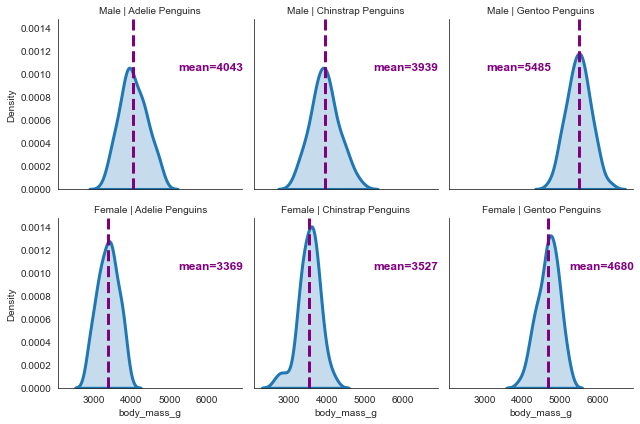

In [32]:
quantity = 'body_mass_g'

g = sns.FacetGrid(peng, row='sex', col='species')
g.map_dataframe(sns.kdeplot, x=quantity, lw=3, shade=True)
g.map_dataframe(add_mean_line, var=quantity)
g.set_titles(row_template='{row_name}', col_template='{col_name} Penguins');